# Fake News Detection


The data was ulitmately provided by [Data Flair](https://data-flair.training/). One downgrade about the data, is that its source is unknown. However, for the goal of this project, We'd assume that the data where collected from online resouces via BeautifulSoup, Selenium or requests, etc.

## About the dataset

The 1st column identifies the news, the second and the third are the title and the text, and the fourth column has classes dentoting whether the news is ***Real*** or ***Fake***.


## Theoretical Knowledge Background
<hr>

### TFIDF-Vectorizer

**TF(Term Frequency):** The Number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others. Accordingly, a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency):** Words that occur many times in a document, but also, occur many times in many others, may be irrelevant. **IDF** is a measure of how significant a term is in the entire corpus.

**-->> TFIDF-Vectorizer** converts a collection of raw documents into a matrix of **TF-IDF** features.
<hr>

### PassiveAggressiveClassifier

Passive Aggressive algorithms are online learning algorithms. Such algorithms remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. **Unlike most other algorithms, it doesn't converge.** *Its purpose* is to make updates that correct the loss, causing very little change in the norm of the weight vector.

**(>_<) Convergence?**

Convergence is just a term of machine learning algorithms where the algorithm reach its consistent solution(the algorithm's behavior stabilizes over time). Meaning that, going through further iterations and adjustments extraneous. Hence, the adjusments and the iterations, at this point, won't significantly change the outcome or the solution it produces.

<hr>

## Importing Libraries & Reading the Data.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Data Modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [39]:
def plot_confusion_matrix(y, y_predict):
    
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y, y_predict)
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Fake', 'Real'],
                yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [2]:
df = pd.read_csv('DataSet/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Data Preprocessing & Cleaning

Changing Column Names

In [3]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [4]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Checking for null values

In [5]:
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### Exploratory Data Analysis

Creating a CountPlot

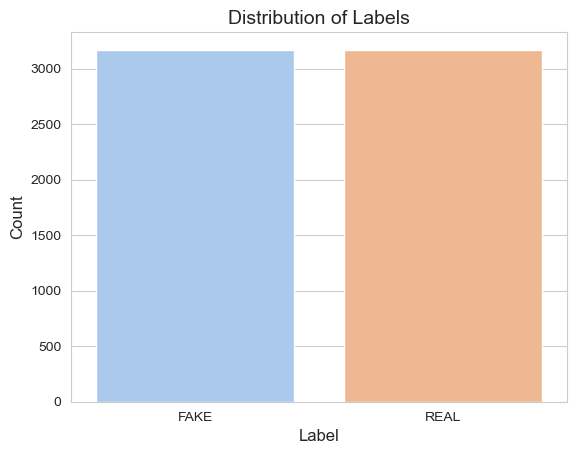

In [8]:
sns.set_style("whitegrid")

sns.countplot(data=df, x='label', palette='pastel')

plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Labels", fontsize=14)

plt.show()

Convert the values of `label` column into Boolean 0s and 1s.

In [10]:
mapping = {'REAL': 0, 'FAKE':1}

df['label'] = df['label'].map(mapping)

df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


## Modelling

In [19]:
# Getting the targets
target = df.label

target.head(10)

0    1
1    1
2    0
3    1
4    0
5    1
6    1
7    0
8    0
9    0
Name: label, dtype: int64

splitting the data into test and train

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], target, test_size=0.2, random_state=7)

In [14]:
type(x_test)

pandas.core.series.Series

##### Let’s initialize a `TfidfVectorizer` with **stop words** from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

### Fitting and Transforming

the vectorizer on the **train data**, and then transforming the vectorizer on the **Test Data**

In [16]:
# Initialize a TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and Transform traindata, Transform testdata
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test =tfidf.transform(x_test)

#### Breaking down the code

`stop_words='english'`: This parameter tells the vectorizer to remove common English stop words (e.g., "the", "is", "and") from the text data. These words are considered non-informative for many NLP tasks.


`max_df=0.7`: This parameter specifies a threshold such that words with a document frequency higher than this value will be ignored.

### Initializing PassiveAggressiveClassifier

In [17]:
# Initializing PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

Predicting tfidf_test

In [20]:
# Predicting

y_hat = pac.predict(tfidf_test)
y_hat[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

### Predicting Accuracy

In [26]:
score = accuracy_score(y_test, y_hat)

print(f'Accuracy Score: {round(score*100, 2)}%')

Accuracy Score: 92.66%


We achieved 92.66% accuracy with this model. A marvelous result.

### Confusion Matrix

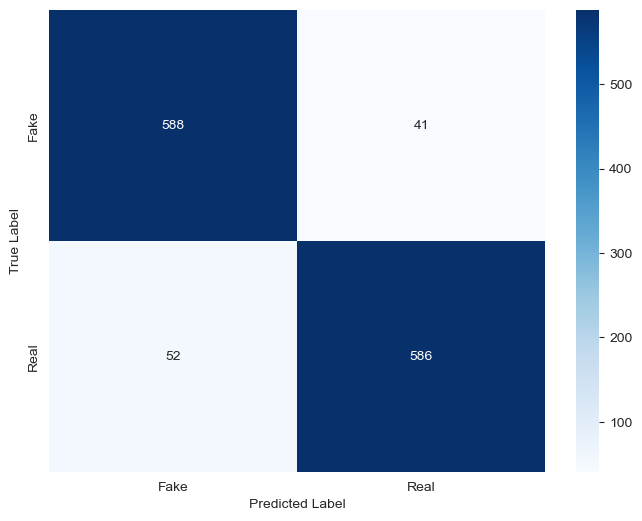

In [41]:
plot_confusion_matrix(y_test, y_hat)


## Summary

We've done the following:

1. We Import and Cleaned the Data
2. Done some Visualizations Through EDA
3. Went Throught Modelling
4. Achieved High Accuracy(92.66%)

#### ==> If this political dataset was gathered from real world news, we could conclude that half of media news is FAKE and/or MISLEADING.